# spaCy 使用筆記

常見的NLP package有NLTK、spaCy、Scikit-learn等等，spaCy 是 NLTK 的主要競爭者，它們的功能類似。

NLP package 比較 https://www.jiqizhixin.com/articles/080502

一些參考網址：
<br>
http://blog.rubenxiao.com/posts/inroduction-for-spacy.html
<br>
https://zhuanlan.zhihu.com/p/36768778

### spaCy 架構
https://spacy.io/architecture-bcdfffe5c0b9f221a2f6607f96ca0e4a.svg

In [42]:
# import spacy
# nlp = spacy.load("en_core_web_lg")
# apple = nlp.vocab['apple']
# print (apple)
# apple.vector.shape

In [22]:
text = "The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013."
text

'The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.'

In [24]:
nlp = spacy.load('en')
doc = nlp(text) # spacy 處理了 text 的屬性
doc

The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.

In [26]:
for token in doc[:10]:
    print('"' + token.text + '"')

"The"
"sequel"
","
"Yes"
","
"Prime"
"Minister"
","
"ran"
"from"


In [27]:
for token in doc[:3]:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

The	0	the	False	False	Xxx	DET	DT
sequel	4	sequel	False	False	xxxx	NOUN	NN
,	10	,	True	False	,	PUNCT	,


In [31]:
# 只看 doc 中的 entity(實體)
for ent in doc.ents:
    print(ent.text, ent.label_)

1986 to 1988 DATE
38 CARDINAL
one CARDINAL
half an hour TIME
Jim Hacker PERSON
BBC Radio ORG
2010 DATE
UKTV Gold ORG
2013 DATE


這段文字中包括，日期、時間、基數（CARDINAL），還標出了 Jim Hacker 是人名、UKTV 和 BBC 是組織名稱

In [33]:
# visualize entity
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [34]:
# 拆解句子
for sent in doc.sents:
    print(sent)

The sequel, Yes, Prime Minister, ran from 1986 to 1988.
In total there were 38 episodes, of which all but one lasted half an hour.
Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.
Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.


In [36]:
# .sents 是 generator 非 list，所以如果要抓出其中的某一句話，必須先將它轉換為 list
doc.sents

In [37]:
list(doc.sents) # 這樣就可以惹

[The sequel, Yes, Prime Minister, ran from 1986 to 1988.,
 In total there were 38 episodes, of which all but one lasted half an hour.,
 Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.,
 Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.]

In [38]:
# 來分析第一個句子！
newdoc = nlp(list(doc.sents)[0].text)

In [39]:
for token in newdoc:
    print("{0}/{1} <--{2}-- {3}/{4}".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

The/DT <--det-- sequel/NN
sequel/NN <--nsubj-- ran/VBD
,/, <--punct-- sequel/NN
Yes/UH <--intj-- sequel/NN
,/, <--punct-- sequel/NN
Prime/NNP <--compound-- Minister/NNP
Minister/NNP <--appos-- sequel/NN
,/, <--punct-- ran/VBD
ran/VBD <--ROOT-- ran/VBD
from/IN <--prep-- ran/VBD
1986/CD <--pobj-- from/IN
to/IN <--prep-- from/IN
1988/CD <--pobj-- to/IN
./. <--punct-- ran/VBD


上面這樣的表達方式看起來好像有點亂@@，換個方法吧！

In [41]:
# visualization
displacy.render(newdoc, style='dep', jupyter=True, options={'distance': 90})

## word embedding

In [43]:
nlp = spacy.load('en_core_web_lg')

In [46]:
print(nlp.vocab['minister'].vector) # 將 minister 轉換成 vector
# spaCy 這個模式是採用 word2vec 在 big data 上訓練的結果

[-3.2239e-01  3.8982e-01  6.4522e-01  8.7596e-02  4.0262e-01 -4.1253e-01
  1.3804e-01 -4.0226e-01 -3.0679e-01  3.6520e+00 -6.1745e-01 -2.4114e-01
  1.7488e-01 -2.5995e-01 -3.8512e-01 -1.3747e-01 -3.7446e-01 -8.0867e-01
  2.8081e-01  2.9735e-01  1.7901e-01 -3.4726e-02  7.2466e-02 -5.2111e-01
  7.1858e-02  1.5913e-01 -6.0877e-01  1.6604e-01 -9.3809e-02  2.0030e-01
 -5.0653e-01 -1.4978e-01  1.7742e-01  3.2996e-02 -2.1082e-01 -6.0442e-02
 -9.6639e-02 -4.6054e-01 -7.1622e-02 -1.4829e-01  5.1362e-01 -3.7840e-01
 -3.2035e-01 -1.1593e-01 -1.5887e-01  2.5999e-01  2.6821e-01  2.7429e-01
 -5.8973e-02 -1.0218e-01  6.6629e-03  3.5737e-01  3.1083e-01  4.7950e-01
  4.4323e-01  8.0089e-03  6.4577e-02 -4.1851e-01  3.2589e-01 -6.0894e-01
 -3.5944e-01  1.9116e-01  1.5910e-02 -1.8912e-01  1.2646e-01 -9.6918e-03
 -6.5529e-01 -4.1851e-01  4.0244e-01 -6.7241e-01 -7.6219e-01  2.6207e-01
 -1.5607e+00  3.2982e-01 -4.1586e-01  3.4098e-01 -1.2571e-01 -1.2014e-01
  1.3608e-02 -1.7894e-01  5.0916e-01 -2.8449e-01 -1

In [47]:
dog = nlp.vocab["dog"]
cat = nlp.vocab["cat"]
apple = nlp.vocab["apple"]
orange = nlp.vocab["orange"]

### 相似度

In [55]:
# 看 dog 和 cat 的相似度
print(dog.similarity(cat))

# 看 dog 和 apple 的相似度
print(dog.similarity(apple))

# 看 dog 和 orange 的相似度
print(dog.similarity(orange))

# 看 apple 和 orange 的相似度
print(apple.similarity(orange))

0.8016855
0.2633902
0.2742508
0.5618917


In [52]:
# 如果是沒有出現過的詞的相似度要如何計算呢？
from scipy.spatial.distance import cosine

In [56]:
# 自訂一個 similarity function
def vector_similarity(x, y):
    return 1 - cosine(x, y)

In [57]:
# 與剛剛使用 similarity() 結果相同
vector_similarity(dog.vector, apple.vector)

0.2633902430534363

In [70]:
# guess_word = king - queen + woman
# 如何找到這個 guess_word?

def make_guess_word(words):
    [first, second, third] = words
    return nlp.vocab[first].vector - nlp.vocab[second].vector + nlp.vocab[third].vector

def get_similar_word(words, scope=nlp.vocab):

    guess_word = make_guess_word(words)

    similarities = []

    for word in scope:
        if not word.has_vector:
            continue

        similarity = vector_similarity(guess_word, word.vector)
        similarities.append((word, similarity))


    similarities = sorted(similarities, key=lambda item: -item[1])
    print([word[0].text for word in similarities[:10]])

In [71]:
words = ["king", "queen", "woman"]
get_similar_word(words)

['MAN', 'Man', 'mAn', 'MAn', 'MaN', 'man', 'mAN', 'WOMAN', 'womAn', 'WOman']


In [72]:
words = ["Paris", "London", "England"]
get_similar_word(words)

['france', 'FRANCE', 'France', 'Paris', 'paris', 'PARIS', 'EUROPE', 'EUrope', 'europe', 'Europe']


### Visualization

In [79]:
import numpy as np
embedding = np.array([])
word_list = []
for token in doc:
    if not(token.is_punct) and not(token.text in word_list):
        word_list.append(token.text)
        
word_list

['The',
 'sequel',
 'Yes',
 'Prime',
 'Minister',
 'ran',
 'from',
 '1986',
 'to',
 '1988',
 'In',
 'total',
 'there',
 'were',
 '38',
 'episodes',
 'of',
 'which',
 'all',
 'but',
 'one',
 'lasted',
 'half',
 'an',
 'hour',
 'Almost',
 'ended',
 'with',
 'a',
 'variation',
 'the',
 'title',
 'series',
 'spoken',
 'as',
 'answer',
 'question',
 'posed',
 'by',
 'same',
 'character',
 'Jim',
 'Hacker',
 'Several',
 'adapted',
 'for',
 'BBC',
 'Radio',
 'and',
 'stage',
 'play',
 'was',
 'produced',
 'in',
 '2010',
 'latter',
 'leading',
 'new',
 'television',
 'on',
 'UKTV',
 'Gold',
 '2013']

In [80]:
for word in word_list:
    embedding = np.append(embedding, nlp.vocab[word].vector)
embedding.shape

(18900,)

In [81]:
embedding = embedding.reshape(len(word_list), -1)
embedding.shape

(63, 300)

In [83]:
# 將高維壓縮到二維空間
from sklearn.manifold import TSNE

tsne = TSNE()
low_dim_embedding = tsne.fit_transform(embedding)

Populating the interactive namespace from numpy and matplotlib


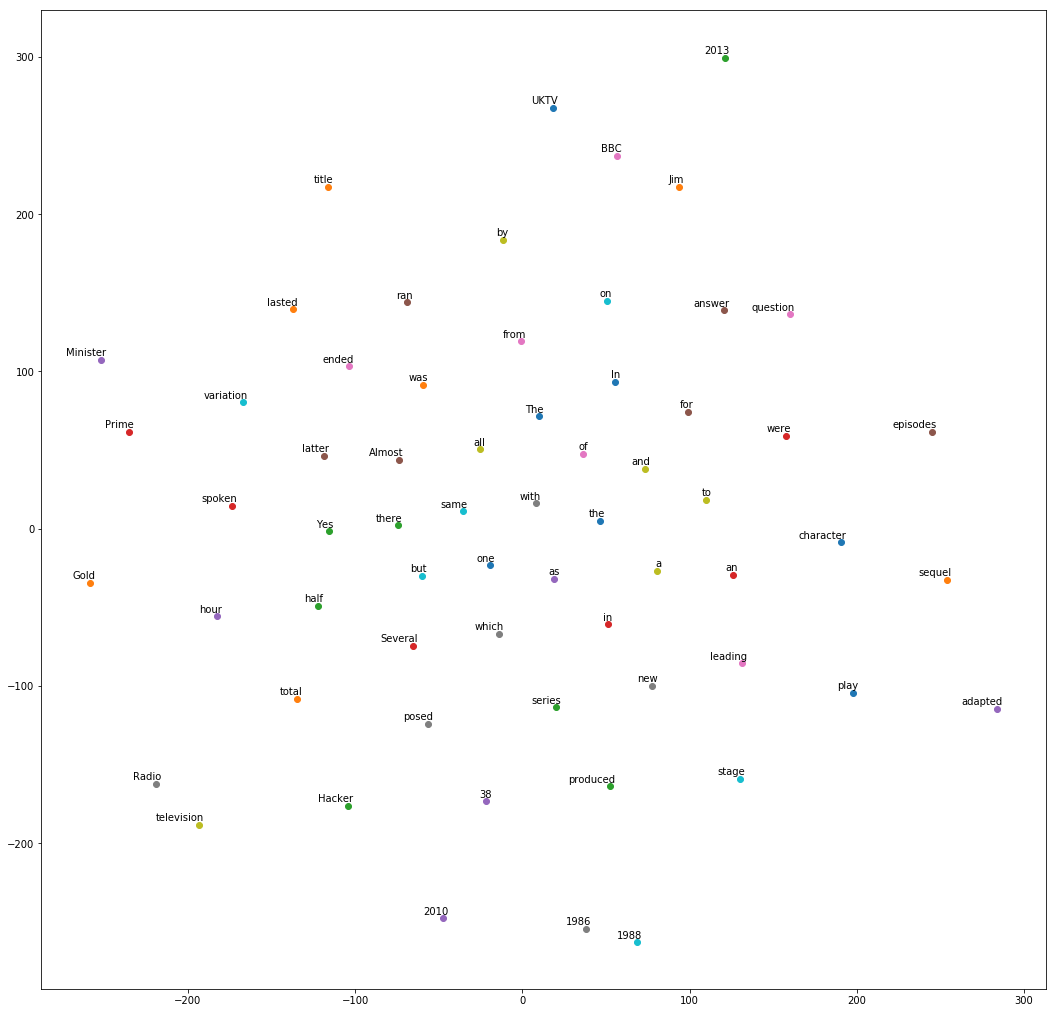

In [85]:
import matplotlib.pyplot as plt
%pylab inline

def plot_with_labels(low_dim_embs, labels, filename='tsne.pdf'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
#     plt.savefig(filename)

plot_with_labels(low_dim_embedding, word_list)